<a href="https://colab.research.google.com/github/Marisagf/Projetos_de_Ciencias_de_Dados/blob/main/Segmenta%C3%A7%C3%A3o_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segmentação de Usuários de APP


A segmentação de usuários em aplicativos consiste em agrupar indivíduos com base em seus padrões de uso e interação com o app.

Essa abordagem permite identificar usuários mais engajados, definir públicos-alvo para campanhas de marketing e resolver diversos desafios de negócios que exigem a identificação de perfis de usuários com comportamentos semelhantes.

Um estudo de caso ilustrando essa aplicação está disponível na plataforma STATSO: Segmentação de Usuários de Aplicativos – Estudo de Caso.



###Problema de Negócio
No cenário altamente competitivo dos aplicativos, empresas e desenvolvedores enfrentam o desafio de compreender melhor seus usuários para aumentar o engajamento e a retenção. Identificar grupos específicos de usuários permite direcionar ações mais eficazes, resultando no aumento do valor do tempo de vida do cliente (LTV – lifetime value).

Neste contexto, foi coletado um conjunto de dados de um aplicativo com o objetivo de desenvolver uma abordagem orientada por dados para segmentar os usuários com base em seus hábitos de uso e padrões de gasto. A meta é identificar perfis de usuários com maior probabilidade de permanecerem ativos e aqueles com tendência à evasão, possibilitando ações preventivas de retenção.

Abaixo estão as variáveis disponíveis no conjunto de dados:

- userid: Identificação única do usuário;
- Average Screen Time: Tempo médio de uso do aplicativo (em minutos);
- Average Spent on App (INR): Valor médio gasto no aplicativo (em rúpias indianas);
- Left Review: Indica se o usuário deixou uma avaliação no app (1 = sim; 0 = não);
- Ratings: Nota dada pelo usuário ao aplicativo;
- New Password Request: Número de vezes que o usuário solicitou uma nova senha;
- Last Visited Minutes: Tempo (em minutos) desde a última visita do usuário;
- Status: Indica se o aplicativo ainda está instalado ou se foi desinstalado.

O objetivo da análise é identificar padrões e relações entre os usuários que ainda utilizam o aplicativo e aqueles que o desinstalaram. Com base nisso, será possível criar segmentos de usuários que ajudem a entender o perfil dos usuários retidos e antecipar os sinais de evasão — oferecendo, assim, a oportunidade de reter usuários antes que eles migrem para aplicativos concorrentes.

#### **Importando os pacotes / bibliotecas**


In [28]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

# para os gráficos/plotagem
import plotly  #para identificação da versão
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

# Importanto o método MinMaxScaler do Sklearn para normalização dos dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Importanto o Método KMeans (algoritmo de classificação)
import sklearn  #para identificação da versão
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# para evitar mensagens de alerta/warnings.
import warnings
warnings.filterwarnings("ignore")

# Carregar o módulo de funções para limpeza de dados
from limpeza_dados import *

In [2]:
# Definindo um template
pio.templates.default = "plotly_white"

#### **Importando o dataset**

In [3]:

data = pd.read_csv("/content/userbehaviour.csv")
# mostrando a parte inicial do dataset
print(data.head())

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  
0        9                     7                  2990    Installed  
1        4                     8                 24008  Uninstalled  
2        8                     5                   971    Installed  
3        6                     2                   799    Installed  
4        5                     6                  3668    Installed  


In [4]:
data.shape

(999, 8)

In [6]:
data.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


#### **Análises**

#### 01 - Tempo de tela mais alto, mais baixo e médio de todos os usuários:

In [7]:
print(f'Average Screen Time = {data["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {data["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {data["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0


02 - Valor mais alto, mais baixo e na média gasta por todos os usuários:

In [8]:
print(f'Average Spend of the Users = {data["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {data["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {data["Average Spent on App (INR)"].min()}')

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


03 - Agora vamos dar uma olhada na relação entre a capacidade de gasto e o tempo de tela dos usuários ativos e dos usuários que desinstalaram o aplicativo:

In [14]:
import plotly.express as px

figure = px.scatter(
    data_frame=data,
    x="Average Screen Time",
    y="Average Spent on App (INR)",
    size="Average Spent on App (INR)",
    color="Status",
    trendline="ols"
)

figure.update_layout(title="Relationship Between Spending Capacity and Screentime")
figure.show()




 Os usuários que desinstalaram o aplicativo tinham um tempo médio de tela de menos de 5 minutos por dia, e o valor médio gasto era inferior a 100. Também podemos ver uma relação linear entre o tempo médio de tela e o gasto médio dos usuários que ainda estão usando o aplicativo.




04 - Relação entre as avaliações dadas pelos usuários e o tempo médio de tela:

In [15]:
figure = px.scatter(data_frame = data,
                    x="Average Screen Time",
                    y="Ratings",
                    size="Ratings",
                    color= "Status",
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")
figure.show()

Então, podemos ver que os usuários que desinstalaram o aplicativo deram no máximo cinco avaliações ao aplicativo.

Seu tempo de tela é muito baixo em comparação com os usuários que deram mais avaliações.

Portanto, isso descreve que os usuários que não gostam de passar mais tempo classificam o aplicativo como baixo e o desinstalam em algum momento

##Segmentação de Usuários de Aplicativos para Encontrar Usuários Retidos e Perdidos

Depois de explorarmos os dados e entendermos algumas relações, chegou a hora de avançar para a segmentação de usuários de aplicativos para encontrar os usuários que o aplicativo reteve e perdeu para sempre.

Para tanto, vamos utilizar o algoritmo de agrupamento K-means em Aprendizado de Máquina para esta tarefa.


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [17]:
data.columns

Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status'],
      dtype='object')

In [16]:
# Fazendo o agrupamento dos dados importantes para o modelo.
clustering_data = data[["Average Screen Time", "Left Review",
                        "Ratings", "Last Visited Minutes",
                        "Average Spent on App (INR)",
                        "New Password Request"]]

In [19]:
# Fazendo a normalização dos dados
for i in clustering_data.columns:
    MinMaxScaler(i)

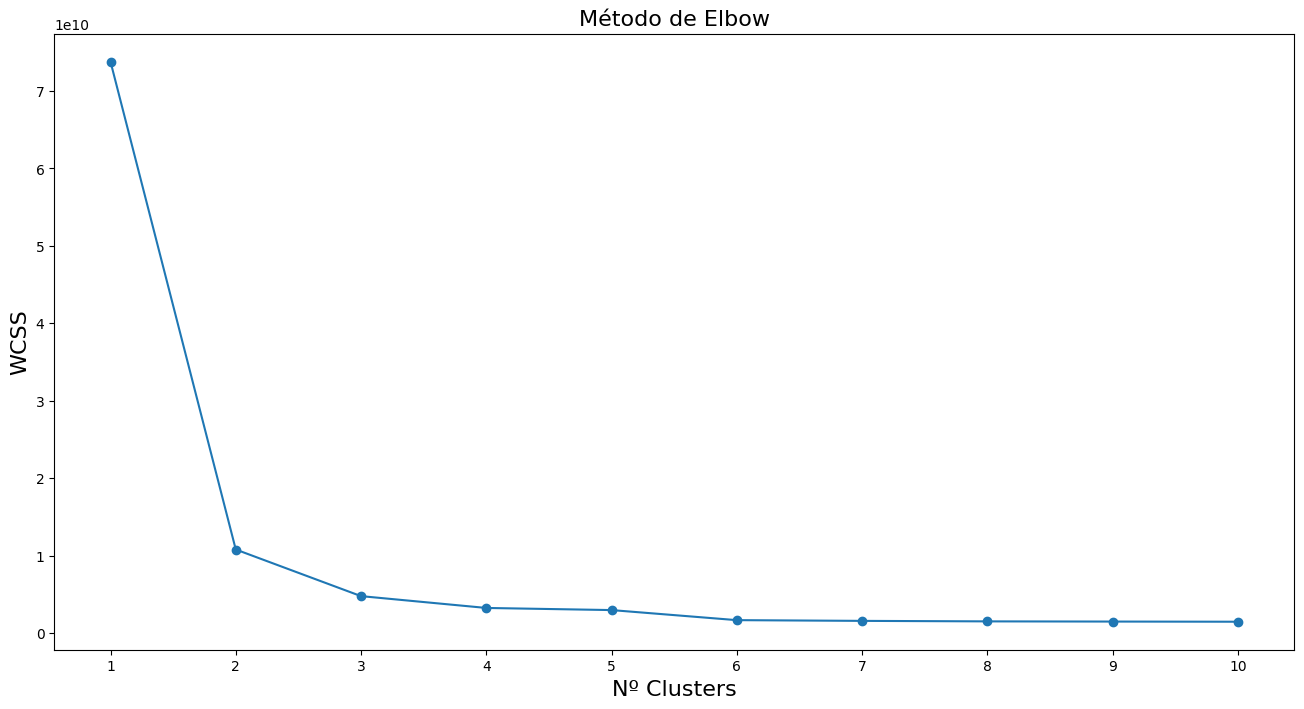

In [26]:
#%% Identificação da quantidade de clusters (Método Elbow)

elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(clustering_data)
    elbow.append(kmeanElbow.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar range
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

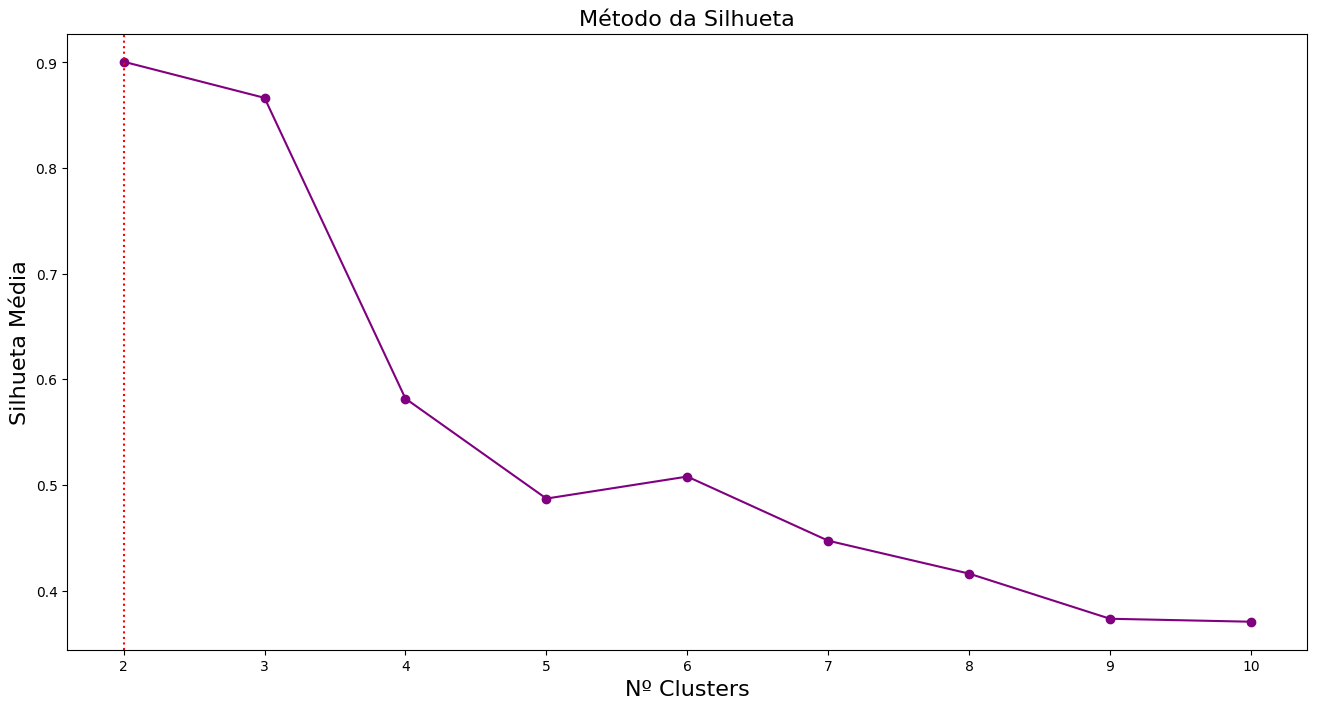

In [29]:
#%% Identificação da quantidade de clusters (Método da Silhueta)

silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I:
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(clustering_data)
    silhueta.append(silhouette_score(clustering_data, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red')
plt.show()

In [41]:
# realizando a classificação.
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(clustering_data)
data["Segments"] = clusters

In [42]:
# apresentando os dados.
print(data.head(10))

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   
5    1006                 28.0                       599.0            0   
6    1007                 49.0                       887.0            1   
7    1008                  8.0                        31.0            0   
8    1009                 28.0                       741.0            1   
9    1010                 28.0                       524.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  Segments  
0        9                     7                  2990    Installed         0  
1        4    

Agora vamos dar uma olhada no número de segmentos que obtivemos:


In [43]:
print(data["Segments"].value_counts())

Segments
0    910
1     45
2     44
Name: count, dtype: int64


In [44]:
# Vamos renomear esse segmentos para melhor entendimento
data["Segments"] = data["Segments"].map({0: "Retained", 1:
    "Churn", 2: "Needs Attention"})

In [45]:
# Vamos visualizar esses segmentos graficamente
PLOT = go.Figure()
for i in list(data["Segments"].unique()):


    PLOT.add_trace(go.Scatter(x = data[data["Segments"]== i]['Last Visited Minutes'],
                                y = data[data["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title = 'Last Visited Minutes',
                   scene = dict(xaxis=dict(title = 'Last Visited Minutes', titlefont_color = 'black'),
                                yaxis=dict(title = 'Average Spent on App (INR)', titlefont_color = 'black')))

- O segmento azul mostra o segmento de usuários que o aplicativo reteve ao longo do tempo.

- O segmento vermelho indica o segmento de usuários que acabaram de desinstalar o aplicativo e em breve vamos perdê-los.

- E o segmento verde indica o segmento de usuários que o aplicativo perdeu.


In [46]:
data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,Retained
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,Needs Attention
2,1003,37.0,207.0,0,8,5,971,Installed,Retained
3,1004,32.0,445.0,1,6,2,799,Installed,Retained
4,1005,45.0,427.0,1,5,6,3668,Installed,Retained


In [47]:
# Filtrar usuários que requerem atenção
usuarios_atencao = data[data['Segments'] == 'Needs Attention'].copy()

# Exibir os primeiros registros (opcional)
print(usuarios_atencao.head())


     userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
1      1002                  0.0                        54.0            0   
68     1069                  0.0                        48.0            1   
109    1110                  0.0                        23.0            0   
114    1115                  5.0                        20.0            1   
122    1123                  3.0                        44.0            1   

     Ratings  New Password Request  Last Visited Minutes       Status  \
1          4                     8                 24008  Uninstalled   
68         4                    10                 26405  Uninstalled   
109        1                    15                 22915  Uninstalled   
114        5                     5                 13331    Installed   
122        0                    13                 28046  Uninstalled   

            Segments  
1    Needs Attention  
68   Needs Attention  
109  Needs Attention  
114  N

## RESUMO

In [48]:
# Quantidade de usuários por segmento
segment_counts = data['Segments'].value_counts()

# Proporção percentual por segmento
segment_percent = data['Segments'].value_counts(normalize=True) * 100

# Juntando em um DataFrame
resumo_segmentos = pd.DataFrame({
    'Quantidade de Usuários': segment_counts,
    'Percentual (%)': segment_percent.round(2)
})

print(resumo_segmentos)


                 Quantidade de Usuários  Percentual (%)
Segments                                               
Retained                            910           91.09
Churn                                45            4.50
Needs Attention                      44            4.40


In [49]:
# Características médias por grupo
caracteristicas_medias = data.groupby("Segments")[[
    "Average Screen Time",
    "Average Spent on App (INR)",
    "Left Review",
    "Ratings",
    "New Password Request",
    "Last Visited Minutes"
]].mean().round(2)

print(caracteristicas_medias)


                 Average Screen Time  Average Spent on App (INR)  Left Review  \
Segments                                                                        
Churn                           2.49                       53.33         0.53   
Needs Attention                 2.14                       50.91         0.39   
Retained                       26.55                      460.83         0.50   

                 Ratings  New Password Request  Last Visited Minutes  
Segments                                                              
Churn               2.93                  9.49              39574.76  
Needs Attention     2.23                  9.20              20277.30  
Retained            6.90                  4.51               2673.32  


In [50]:
# Cruzamento entre segmentos e status do app
status_por_segmento = pd.crosstab(data['Segments'], data['Status'], normalize='index') * 100
status_por_segmento = status_por_segmento.round(2)

print(status_por_segmento)


Status           Installed  Uninstalled
Segments                               
Churn                 0.00       100.00
Needs Attention      13.64        86.36
Retained            100.00         0.00


#### Exportar relatório

In [51]:
with pd.ExcelWriter("relatorio_segmentacao_usuarios.xlsx") as writer:
    resumo_segmentos.to_excel(writer, sheet_name="Resumo Segmentos")
    caracteristicas_medias.to_excel(writer, sheet_name="Médias por Segmento")
    status_por_segmento.to_excel(writer, sheet_name="Status por Segmento")
